https://www.kaggle.com/ash316/eda-to-prediction-dietanic

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

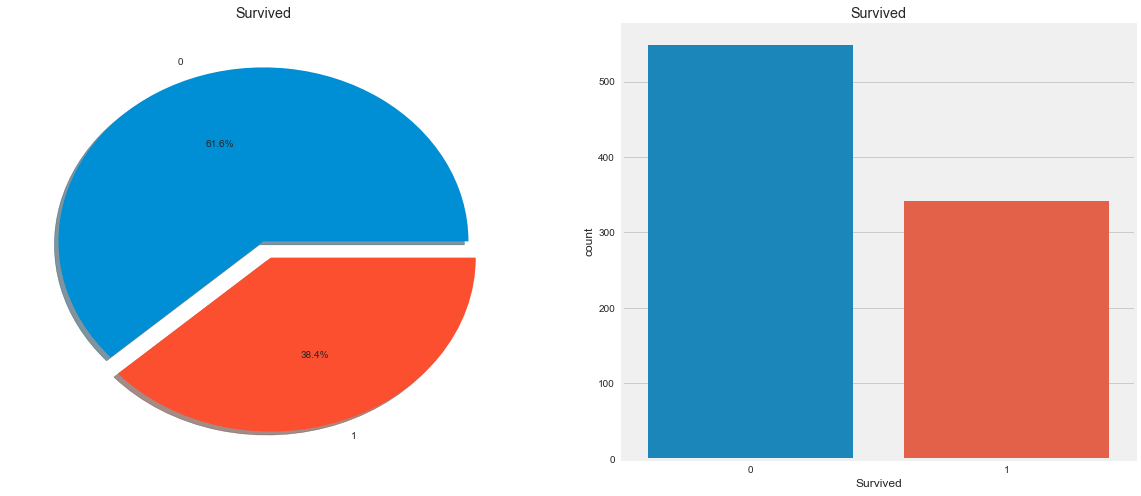

In [4]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [5]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [6]:
data.groupby(['Sex', 'Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [7]:
data.groupby(['Sex', 'Survived'])['Sex'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

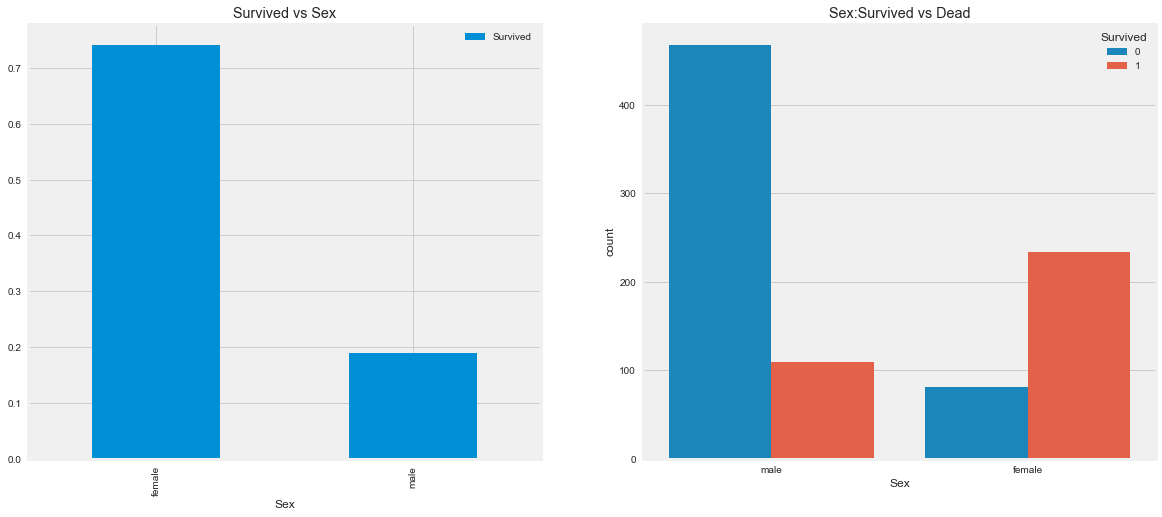

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [9]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

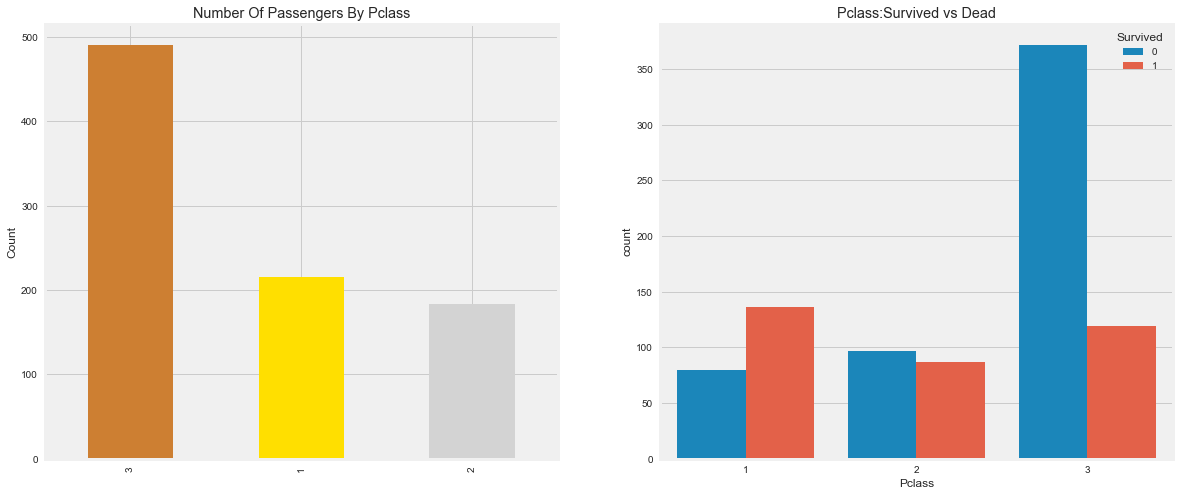

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

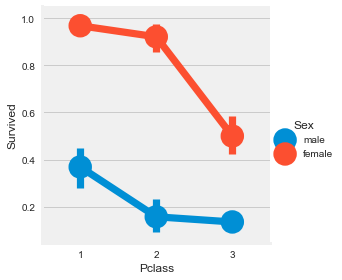

In [12]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

In [13]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

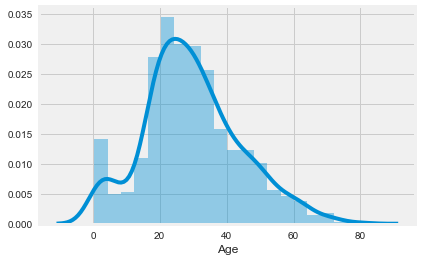

In [14]:
sns.distplot(data.Age[data.Age.notnull()])
plt.show()

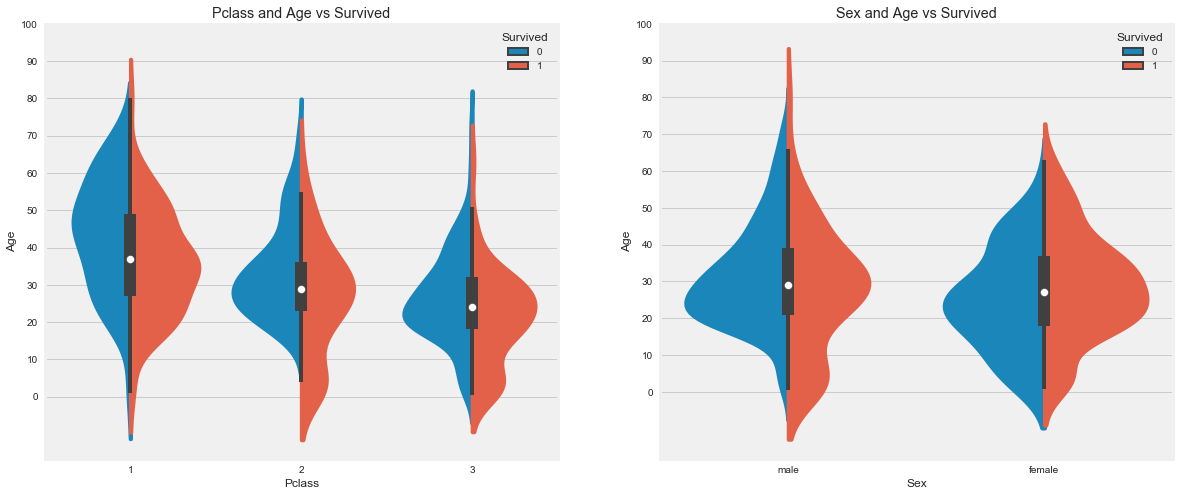

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [16]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [17]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

In [18]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [19]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [20]:
data.Initial.value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

In [21]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [22]:
data.Age.isnull().any()

False

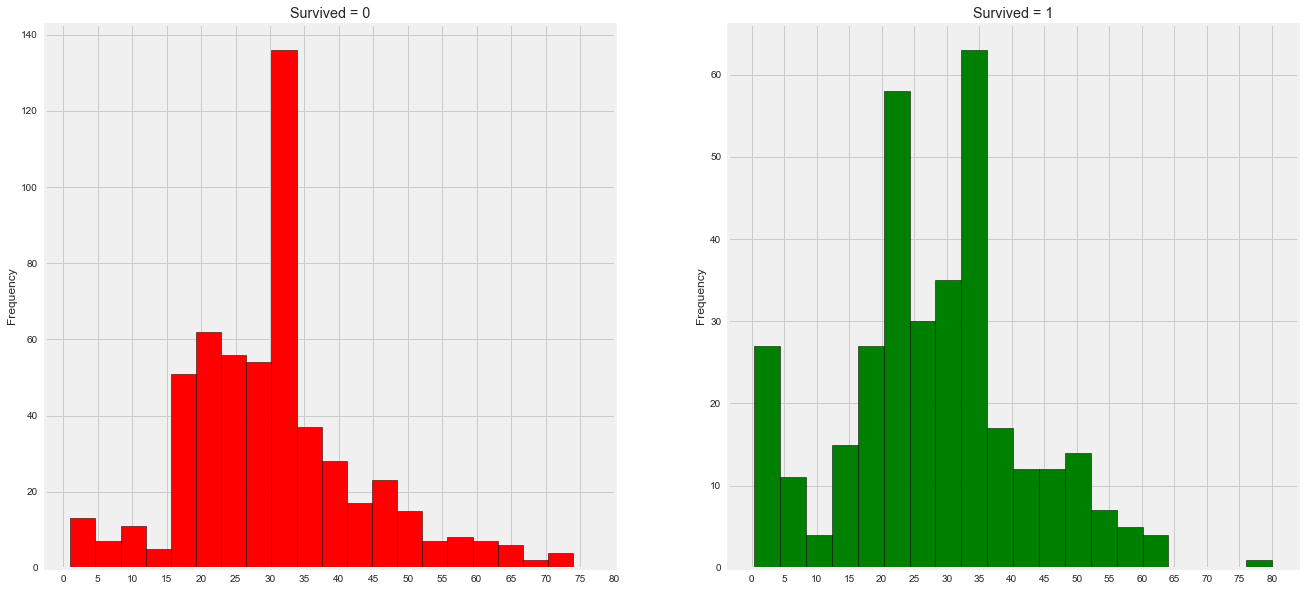

In [23]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

data[data.Survived == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data.Survived == 1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

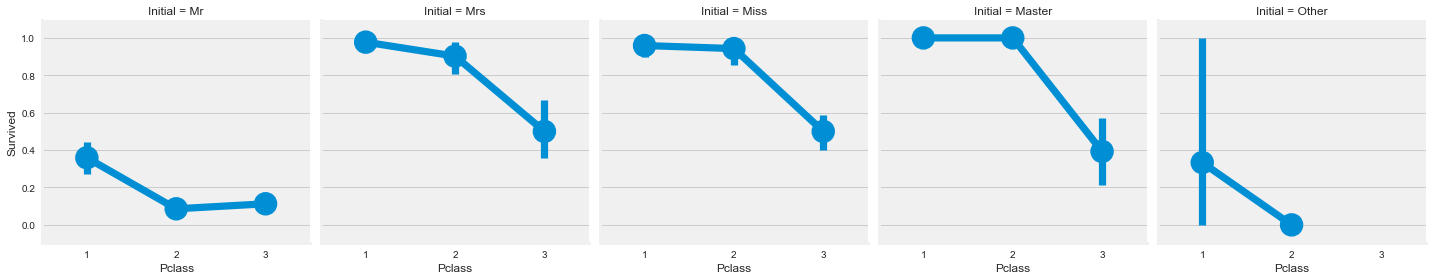

In [24]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

In [25]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

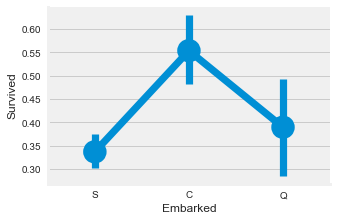

In [26]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

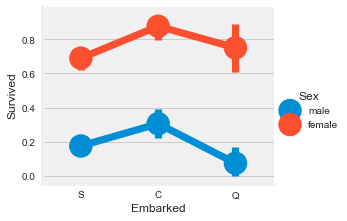

In [27]:
sns.factorplot('Embarked', 'Survived', hue='Sex', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

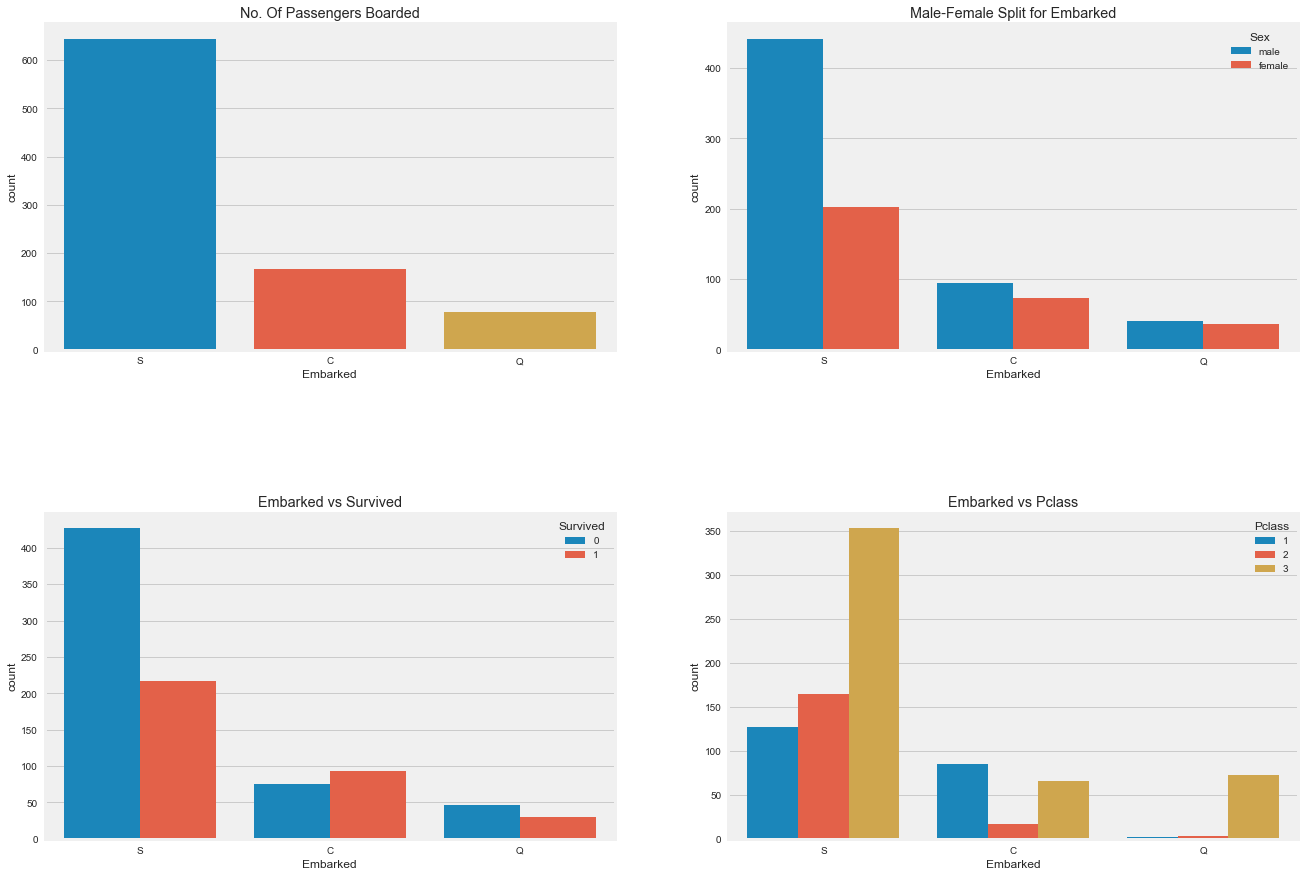

In [28]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

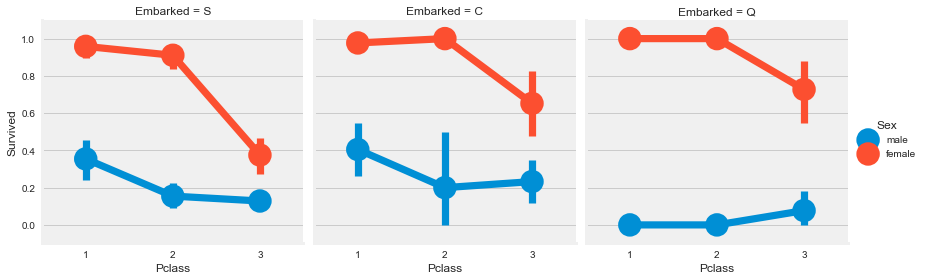

In [29]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

In [30]:
data['Embarked'].fillna('S', inplace=True)

In [31]:
data.Embarked.isnull().any()

False

In [32]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

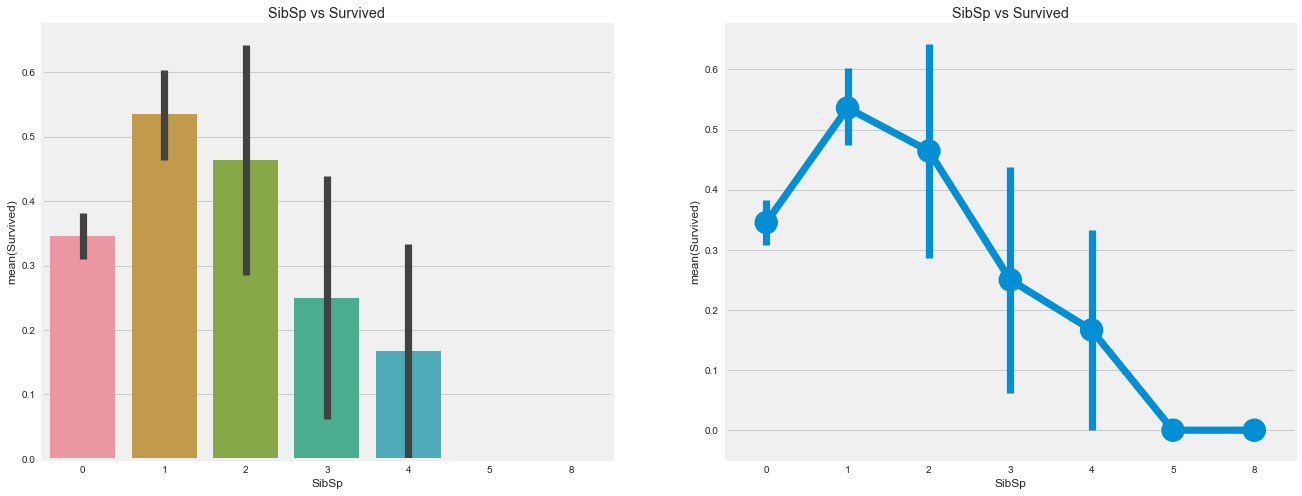

In [38]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [39]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

In [40]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

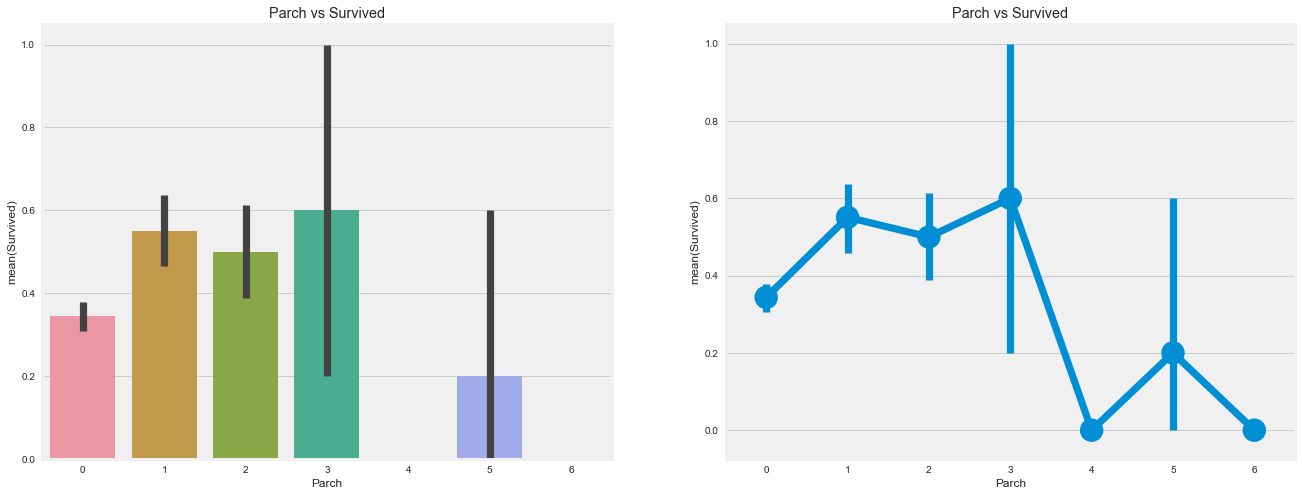

In [41]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

In [42]:
pd.crosstab(data.Parch + data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

In [43]:
pd.crosstab(data.Parch + data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

In [44]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

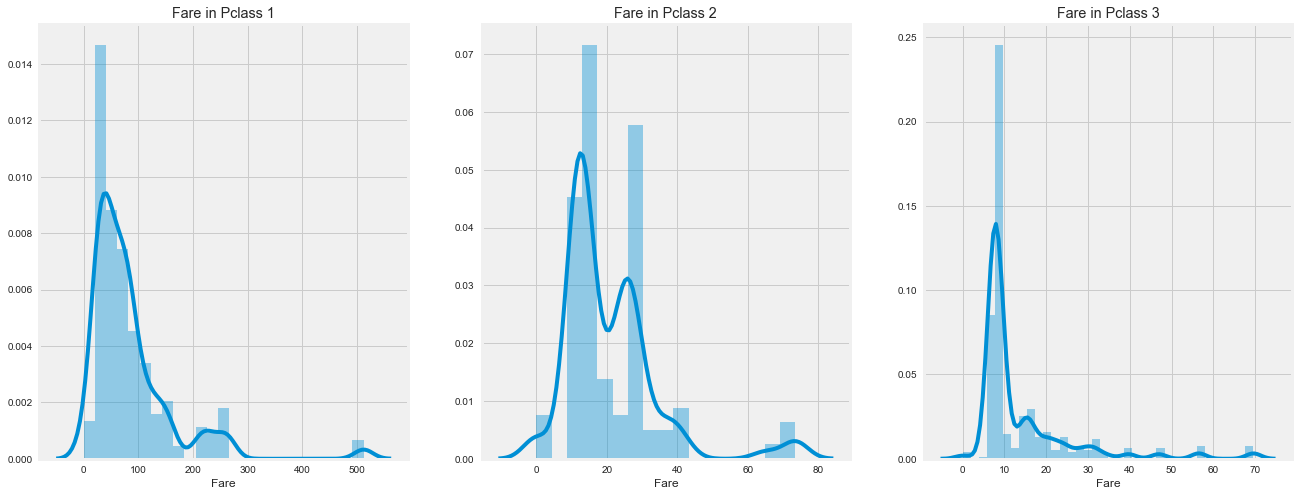

In [45]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
for i in range(3):
    sns.distplot(data[data.Pclass == i + 1].Fare, ax=ax[i])
    ax[i].set_title('Fare in Pclass %d' % (i + 1))
plt.show()

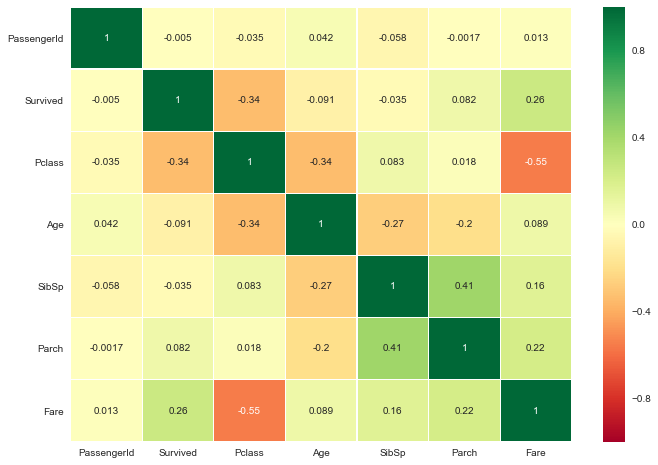

In [46]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

In [53]:
data['Age_band'] = pd.cut(data.Age, 5, labels=list(range(5)))
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [54]:
data.Age_band.value_counts().to_frame().style.background_gradient(cmap='summer')

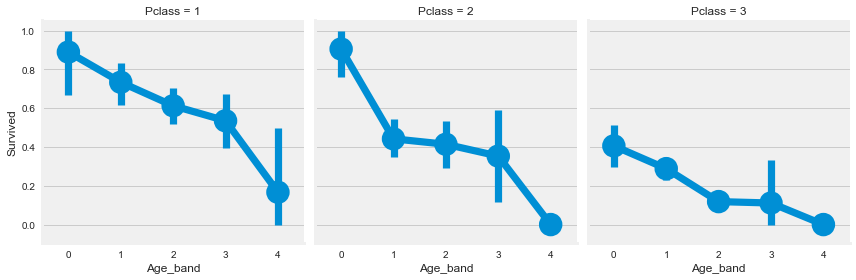

In [55]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

In [56]:
data['Family_Size'] = data.Parch + data.SibSp
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

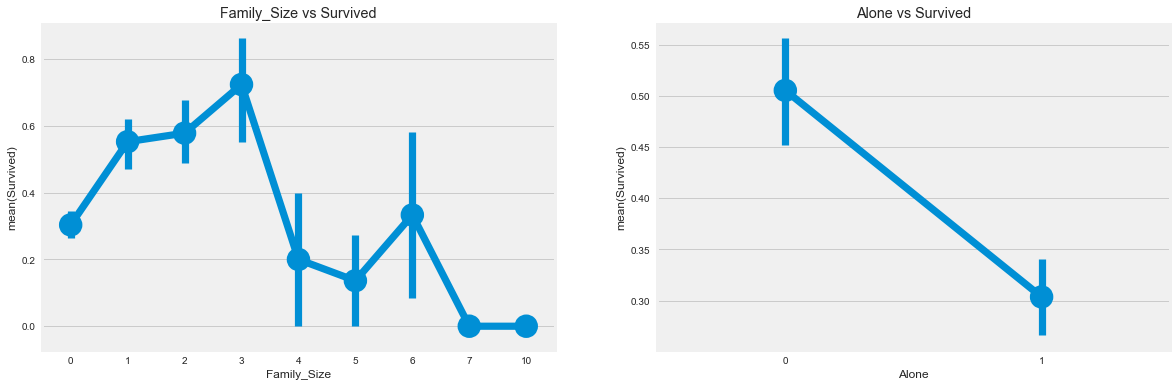

In [57]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

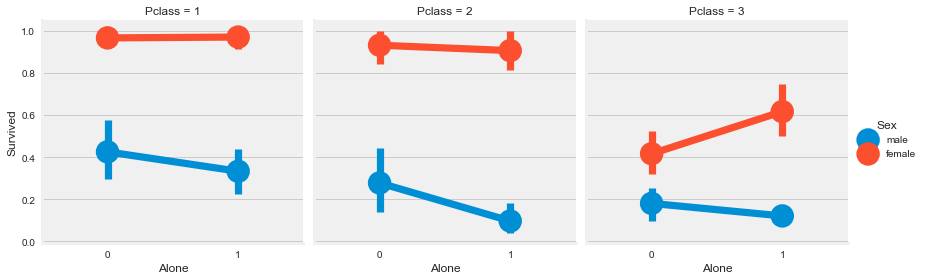

In [58]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

In [60]:
data['Fare_Range'] = pd.qcut(data.Fare, 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

In [61]:
data['Fare_cat'] = pd.qcut(data.Fare, 4, labels=list(range(4)))
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"[0, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31, 512.329]",3


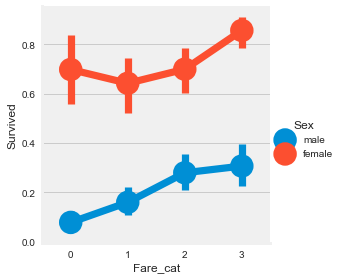

In [62]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

In [63]:
data.Sex.replace(['male', 'female'], [0, 1], inplace=True)
data.Embarked.replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data.Initial.replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

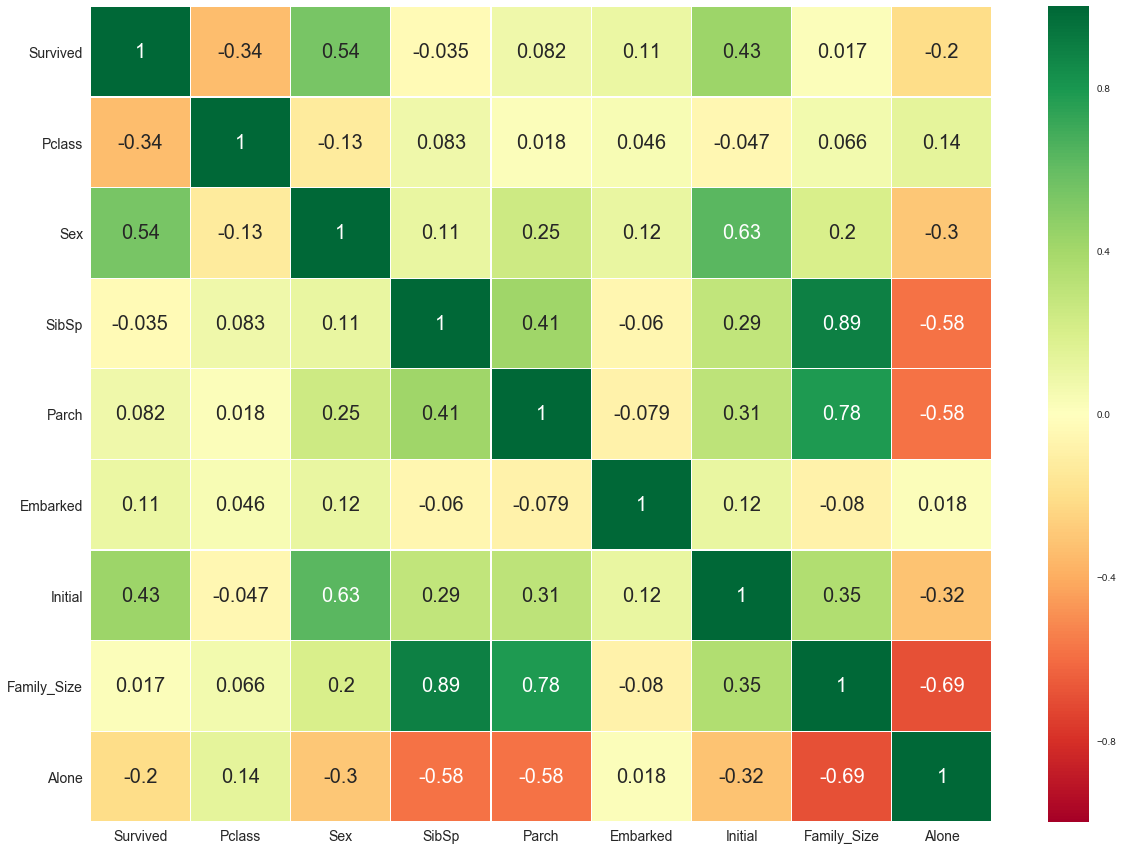

In [64]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 20})
plt.gcf().set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [65]:
data.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


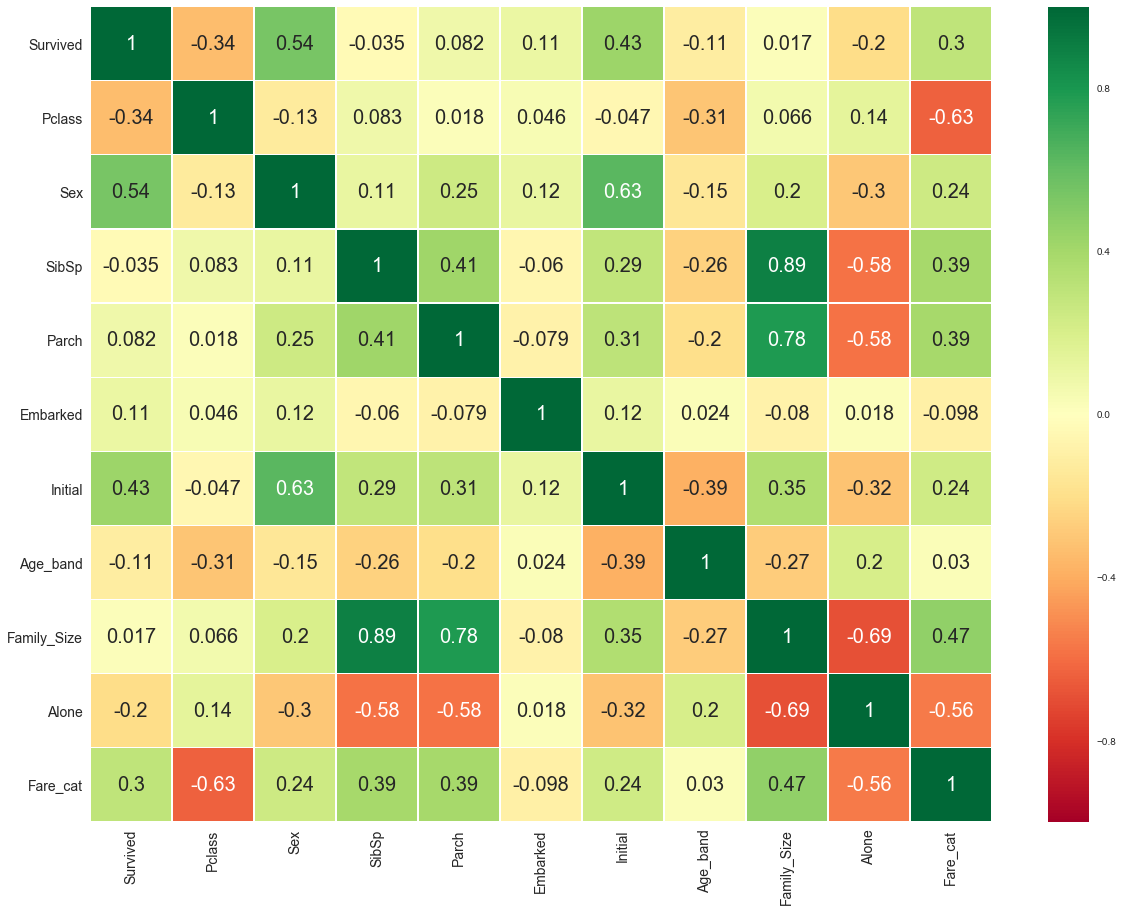

In [77]:
# Age_bandとFare_catがintでcorrに現れなかったため型を変更
data = data.astype({'Age_band': float, 'Fare_cat': float})
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 20})
plt.gcf().set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [79]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_x = train[train.columns[1:]]
train_y = train[train.columns[:1]]
test_x = test[test.columns[1:]]
test_y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data.Survived

In [80]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
231,0,3,0,0,0,0,0,1.0,0,1,0.0
836,0,3,0,0,0,0,0,1.0,0,1,1.0
639,0,3,0,1,0,0,0,2.0,1,0,2.0
389,1,2,1,0,0,1,2,1.0,0,1,1.0
597,0,3,0,0,0,0,0,3.0,0,1,0.0


In [82]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_x, train_y)
prediction1 = model.predict(test_x)
print('Accuracy for rbf-SVM is ', metrics.accuracy_score(prediction1, test_y))

Accuracy for rbf-SVM is  0.835820895522


In [83]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_x, train_y)
prediction2 = model.predict(test_x)
print('Accuracy for linear-SVM is ', metrics.accuracy_score(prediction2, test_y))

Accuracy for linear-SVM is  0.817164179104


In [84]:
model = LogisticRegression()
model.fit(train_x, train_y)
prediction3 = model.predict(test_x)
print('The accuracy of the Logistic Regression is ', metrics.accuracy_score(prediction3, test_y))

The accuracy of the Logistic Regression is  0.817164179104


In [85]:
model = DecisionTreeClassifier()
model.fit(train_x, train_y)
prediction4 = model.predict(test_x)
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction4, test_y))

The accuracy of the Decision Tree is  0.791044776119


In [87]:
model = KNeighborsClassifier()
model.fit(train_x, train_y)
prediction5 = model.predict(test_x)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5, test_y))

The accuracy of the KNN is 0.824626865672


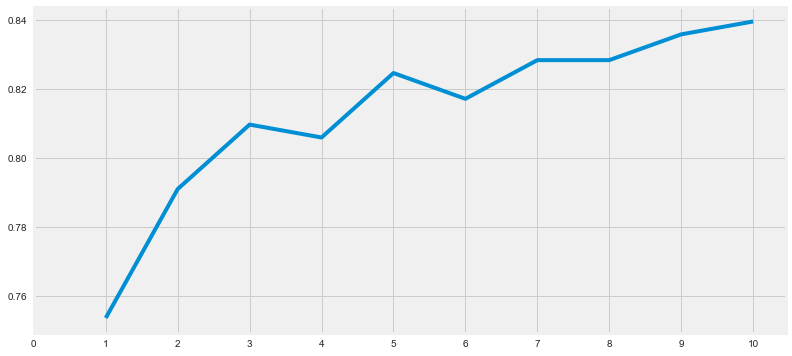

In [88]:
a_index = list(range(1, 11))
a = pd.Series()
x = list(range(11))
for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_x, train_y)
    prediction = model.predict(test_x)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.gcf().set_size_inches(12, 6)
plt.show()

In [89]:
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

Accuracies for different values of n are: [ 0.75373134  0.79104478  0.80970149  0.80597015  0.82462687  0.81716418
  0.82835821  0.82835821  0.8358209   0.83955224] with the max value as  0.839552238806


In [90]:
model = GaussianNB()
model.fit(train_x, train_y)
prediction6 = model.predict(test_x)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_y))

The accuracy of the NaiveBayes is 0.809701492537


In [91]:
model = RandomForestClassifier()
model.fit(train_x, train_y)
prediction7 = model.predict(test_x)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_y))

The accuracy of the Random Forests is 0.80223880597
